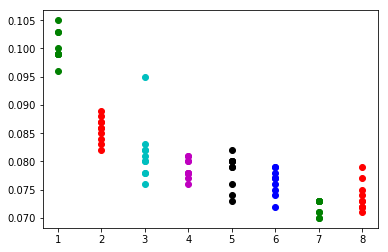

In [17]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import time
import pylab as pl

df = pd.read_table("Russell.txt",sep=" ",header=None)
df = df.drop(947, 1)
cov=np.array(df)

def findMaxEigen(cov,eps=0.01,negative_eigen=False):
    if negative_eigen==False:
        LL=cov.shape[0]
        vector=np.random.rand(LL)
        vector=vector.reshape(LL,1)
        vector=vector/norm(vector)
        while(True):
            tempv=np.matmul(cov,vector)
            tempv=tempv/norm(tempv)
            if norm(tempv-vector)<eps:
                vector=tempv
                break
            vector=tempv
        tempv=np.matmul(cov,vector)
        eigenvalue=norm(tempv)/norm(vector)
        return eigenvalue,vector
    else:
        LL=cov.shape[0]
        vector=np.random.rand(LL)
        vector=vector.reshape(LL,1)
        vector=vector/norm(vector)
        mark=+1
        while(True):
            tempv=np.matmul(cov,vector)
            tempv=tempv/norm(tempv)
            if norm(tempv-vector)<eps:
                vector=tempv
                break
            if norm(tempv+vector)<eps:
                vector=tempv
                mark=-1
                break
            vector=tempv
        tempv=np.matmul(cov,vector)
        eigenvalue=mark*norm(tempv)/norm(vector)
        return eigenvalue,vector

    
looptime=[]
PowerRange=8 # the maximum power we want to try
ValueNumber=5 # the number of eigenvalues we are interested in 
statistics=10
for i in range(statistics):
    for NN in range(1,PowerRange+1):
        #print("mark1")
        start = time.time()
        tempcov=np.copy(cov)
        for i in range(NN-1):
            tempcov=np.matmul(tempcov,cov)
        mcov=np.copy(tempcov)
        count=0
        middle=time.time()
        evalue=[]
        evector=[]
        while True:
            #print("mark2")
            value,vector=findMaxEigen(mcov)
            if count==ValueNumber-1:
                break
            count+=1
            evalue.append(value)
            evector.append(vector)
            mcov=mcov-value*np.matmul(vector,vector.transpose())
        end= time.time()
        looptime.append(end-middle)

LT=((np.array(looptime)).reshape(statistics,PowerRange)).transpose()

color_set=["bo","go","ro","co","mo","ko"]*2

count=0
for YY in LT:
    count+=1
    pl.plot(len(YY)*[count],np.abs(YY),color_set[count])
#pl.ylim(0,0.1)
pl.show()